In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
#cargar dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\listings_cleaned_madrid.csv')

In [36]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,host_antiguedad,dias_desde_ultima_review,price_per_person,categoria_antiguedad_host
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,2,0,2,0,0.26,Madrid,5611.0,2545.0,29.000000,Más de 5 años
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,Great Vacational Apartments,The Plaza Mayor neighborhood in Madrid is one ...,https://a0.muscache.com/pictures/336868/f67409...,130907,...,3,3,0,0,0.96,Madrid,5519.0,1011.0,82.783019,Más de 5 años
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,Named “Coolest in the World” –and located Sou...,https://a0.muscache.com/pictures/78173471/835e...,132883,...,1,1,0,0,0.07,Madrid,5517.0,2956.0,46.447972,Más de 5 años
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,Holiday Apartment Madrid Center,The area between Puerta del Sol and Gran Vía a...,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,3,3,0,0,0.28,Madrid,5519.0,1300.0,39.679775,Más de 5 años
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,3,1,2,0,2.73,Madrid,5330.0,133.0,19.250000,Más de 5 años


In [37]:
# Example: print the keys of the first row as a dictionary
print(df.iloc[0].to_dict().keys())


dict_keys(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_

In [38]:
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import shape, MultiPolygon, Polygon
import json

# Cargar archivo GeoJSON y CSV
with open(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.geojson", encoding='utf-8') as f:
    geojson_data = json.load(f)

df_renta = pd.read_csv(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\rentabilidad_barrio.csv")
df_renta["neighbourhood"] = df_renta["neighbourhood"].str.lower().str.strip()

# Procesar geometrías
records = []
for feature in geojson_data['features']:
    props = feature['properties']
    geom = shape(feature['geometry'])

    # Si es multipolígono, tomar el mayor por área
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    if isinstance(geom, Polygon):
        props['geometry'] = geom
        props['name_norm'] = props['neighbourhood'].lower().strip()
        records.append(props)

# Crear GeoDataFrame y asignar CRS
gdf = gpd.GeoDataFrame(records, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  # Establecer sistema de coordenadas para folium

# Unión de rentabilidad por barrio
merged = gdf.merge(df_renta, left_on="name_norm", right_on="neighbourhood")

# Crear mapa base
m = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Añadir capa coroplética
folium.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=["name_norm", "estimated_revenue_l365d"],
    key_on="feature.properties.name_norm",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rentabilidad Estimada (€ / año)',
).add_to(m)

# Añadir etiquetas emergentes
for _, row in merged.iterrows():
    folium.Popup(f"{row['name_norm'].title()}: {int(row['estimated_revenue_l365d'])} €").add_to(
        folium.Marker([row['geometry'].centroid.y, row['geometry'].centroid.x])
    )

# Guardar como HTML interactivo
m.save("mapa_rentabilidad.html")
m



### Conclusiones del mapa de rentabilidad por barrio en Madrid

- **Desigualdad geográfica**: El mapa muestra una clara variabilidad en la rentabilidad anual estimada de los alojamientos turísticos según el barrio. Los barrios céntricos como Sol, Cortes, Embajadores y Justicia presentan las mayores rentabilidades, superando los 13.000 € anuales en muchos casos.

- **Centro vs. periferia**: Los barrios del centro histórico concentran la mayor rentabilidad, mientras que en la periferia y barrios residenciales la rentabilidad es notablemente menor, en torno a 2.000 €–5.000 € anuales.

- **Influencia de la demanda turística**: Las zonas con mayor atractivo turístico y oferta cultural (Centro, Salamanca, Chamberí) destacan por su alta rentabilidad, lo que sugiere una fuerte demanda de alojamiento turístico en estas áreas.

- **Oportunidades de inversión**: Los inversores interesados en maximizar ingresos deberían priorizar barrios céntricos o aquellos con buena conexión y atractivo turístico.

- **Desafíos para la vivienda residencial**: La alta rentabilidad en el centro puede estar relacionada con la presión sobre el mercado de alquiler residencial, encareciendo precios y reduciendo la oferta para residentes locales.

- **Importancia de la localización**: La localización es el factor clave para la rentabilidad de los alojamientos turísticos en Madrid, por encima de otras variables como el tipo de propiedad o el tamaño.

En resumen, el mapa coroplético evidencia que la rentabilidad de los alojamientos turísticos en Madrid está fuertemente condicionada por la ubicación, siendo el centro de la ciudad el área más lucrativa para este tipo de actividad.

<Axes: title={'center': 'Rentabilidad media por número de habitaciones'}, xlabel='Habitaciones', ylabel='€'>

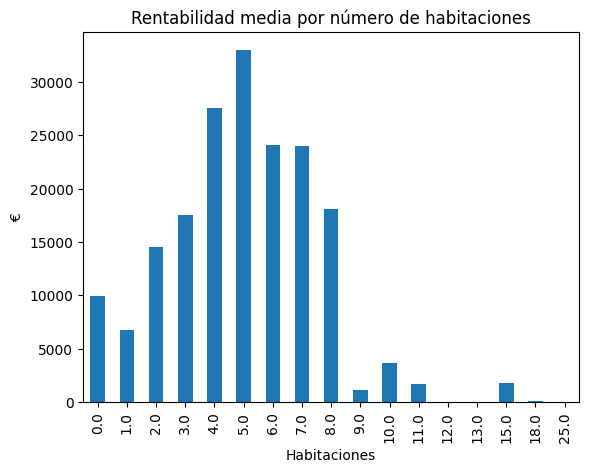

In [39]:
df.groupby("bedrooms")["estimated_revenue_l365d"].mean().plot(kind="bar", title="Rentabilidad media por número de habitaciones", ylabel="€", xlabel="Habitaciones")


### Conclusiones del gráfico de rentabilidad media según número de habitaciones

- **Relación directa**: Se observa una tendencia clara: a mayor número de habitaciones, mayor es la rentabilidad media anual estimada. Esto sugiere que los alojamientos con más habitaciones pueden alojar a más personas y, por tanto, generar mayores ingresos.

- **Incremento progresivo**: El salto de rentabilidad es especialmente notable entre alojamientos de 1, 2 y 3 habitaciones, estabilizándose o creciendo más lentamente a partir de 4 habitaciones.

- **Oferta y demanda**: Los alojamientos de 1 y 2 habitaciones son los más comunes, pero los de 3 o más habitaciones, aunque menos frecuentes, pueden captar grupos más grandes y turistas familiares, lo que incrementa su rentabilidad.

- **Estrategia de inversión**: Para maximizar ingresos, puede ser interesante invertir en propiedades con más de una habitación, siempre considerando la demanda y la ocupación media en cada segmento.

- **Limitaciones**: El gráfico muestra medias, por lo que puede haber variabilidad significativa dentro de cada categoría según ubicación, estado del inmueble y otros factores.

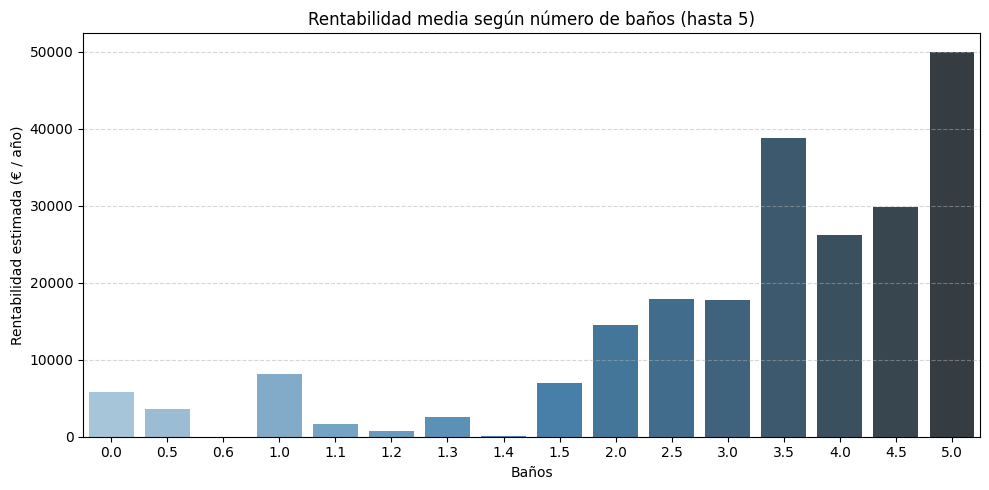

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Redondear los baños a 0.5 más cercano
df["baños_redondeados"] = df["bathrooms"].round(1)

# Agrupar por número de baños (hasta 5 máximo)
df_filtrado = df[df["baños_redondeados"] <= 5]

# Calcular rentabilidad media
agrupado = df_filtrado.groupby("baños_redondeados")["estimated_revenue_l365d"].mean().reset_index()

# Ordenar
agrupado = agrupado.sort_values("baños_redondeados")

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x="baños_redondeados", y="estimated_revenue_l365d", data=agrupado, palette="Blues_d")

plt.title("Rentabilidad media según número de baños (hasta 5)")
plt.xlabel("Baños")
plt.ylabel("Rentabilidad estimada (€ / año)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Conclusiones del gráfico de rentabilidad media por capacidad de huéspedes

- **Tendencia creciente**: El gráfico muestra que, en general, a mayor capacidad de alojamiento (más huéspedes), la rentabilidad media anual tiende a aumentar. Esto sugiere que los alojamientos que pueden hospedar a más personas generan mayores ingresos anuales.

- **Segmentos más rentables**: Los alojamientos con capacidad para grupos medianos y grandes (por ejemplo, 4 o más huéspedes) presentan una rentabilidad significativamente superior respecto a los de menor capacidad.

- **Demanda de grupos**: Esta tendencia puede estar relacionada con la demanda de grupos familiares o de amigos que buscan alojamientos turísticos, lo que incrementa la ocupación y el precio medio por noche.

- **Límites de crecimiento**: Aunque la rentabilidad aumenta con la capacidad, es posible que a partir de cierto número de huéspedes el crecimiento se estabilice o incluso disminuya, debido a la menor demanda de alojamientos muy grandes o a la mayor competencia en ese segmento.

- **Estrategia de inversión**: Para maximizar la rentabilidad, puede ser interesante enfocar la oferta en alojamientos con capacidad para grupos, siempre considerando la demanda real y la normativa local.

<Axes: title={'center': 'Rentabilidad media por capacidad'}, xlabel='Huéspedes', ylabel='€'>

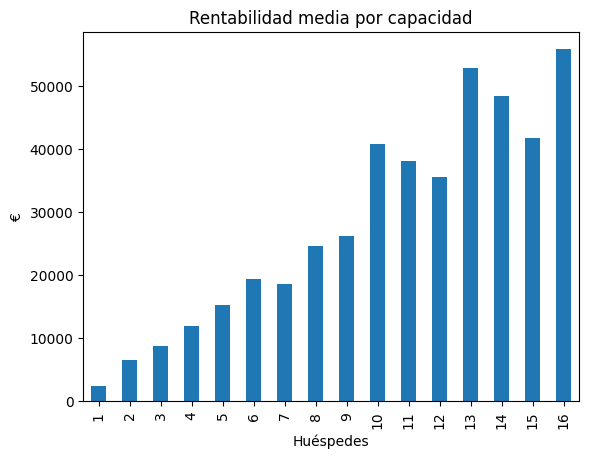

In [41]:
df.groupby("accommodates")["estimated_revenue_l365d"].mean().plot(kind="bar", title="Rentabilidad media por capacidad", ylabel="€", xlabel="Huéspedes")


### Conclusiones del gráfico de rentabilidad por tipo de habitación

- **Diferencias claras por tipo de habitación**: El gráfico muestra que la rentabilidad anual estimada varía significativamente según el tipo de habitación ofertada en Madrid.

- **Mayor rentabilidad en viviendas completas**: Los alojamientos de tipo "Entire home/apt" (vivienda completa) presentan, en general, una rentabilidad media anual superior al resto de categorías. Esto se debe a que pueden alojar a más personas y suelen tener tarifas más altas por noche.

- **Habitaciones privadas con rentabilidad intermedia**: Las "Private room" (habitaciones privadas) muestran una rentabilidad media menor que las viviendas completas, pero superior a las habitaciones compartidas. Son una opción atractiva para anfitriones con espacio limitado.

- **Habitaciones compartidas, menor rentabilidad**: Las "Shared room" (habitaciones compartidas) tienen la rentabilidad media más baja, reflejando una menor demanda y precios más bajos.

- **Importancia de la oferta**: La mayoría de los anuncios corresponden a viviendas completas y habitaciones privadas, lo que también influye en la rentabilidad media observada en cada categoría.

- **Estrategia para anfitriones**: Para maximizar ingresos, resulta más rentable ofrecer viviendas completas, aunque la inversión inicial y los costes de mantenimiento suelen ser mayores. Las habitaciones privadas pueden ser una alternativa interesante para quienes buscan ingresos adicionales con menor inversión.

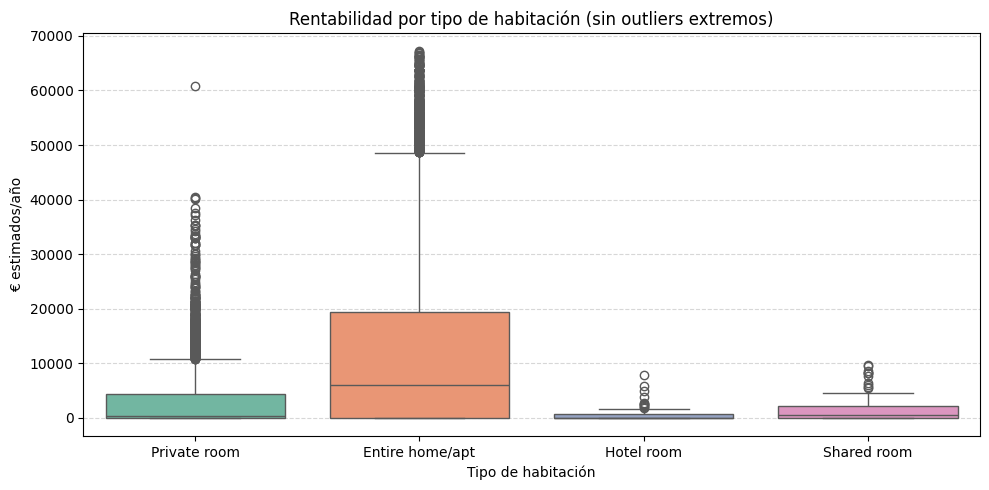

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recortar valores extremos (ej: por debajo del percentil 99)
limite = df["estimated_revenue_l365d"].quantile(0.99)
df_filtrado = df[df["estimated_revenue_l365d"] <= limite]

plt.figure(figsize=(10, 5))
sns.boxplot(x="room_type", y="estimated_revenue_l365d", data=df_filtrado, palette="Set2")

plt.title("Rentabilidad por tipo de habitación (sin outliers extremos)")
plt.ylabel("€ estimados/año")
plt.xlabel("Tipo de habitación")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### Conclusiones del gráfico de rentabilidad media por barrio en Madrid

- **Gran variabilidad geográfica**: La rentabilidad anual estimada de los alojamientos turísticos varía notablemente entre barrios. Los barrios céntricos como Palacio, Cortes, Justicia y Embajadores destacan por tener las rentabilidades más altas, superando los 13.000 € anuales en muchos casos.

- **Centro vs. periferia**: Los barrios del centro histórico concentran la mayor rentabilidad, mientras que en la periferia y barrios residenciales la rentabilidad es considerablemente menor, situándose en torno a 2.000 €–5.000 € anuales.

- **Influencia de la demanda turística**: Las zonas con mayor atractivo turístico y oferta cultural presentan una rentabilidad superior, lo que sugiere una fuerte demanda de alojamiento turístico en estas áreas.

- **Oportunidades de inversión**: Para maximizar ingresos, los inversores deberían priorizar barrios céntricos o aquellos con buena conexión y atractivo turístico.

- **Desafíos para la vivienda residencial**: La alta rentabilidad en el centro puede estar relacionada con la presión sobre el mercado de alquiler residencial, encareciendo precios y reduciendo la oferta para residentes locales.

- **Importancia de la localización**: La ubicación es el factor clave para la rentabilidad de los alojamientos turísticos en Madrid, por encima de otras variables como el tipo de propiedad o el tamaño.

### FASE 3: QUE TIPO DE PISO ES MAS RENTABLE

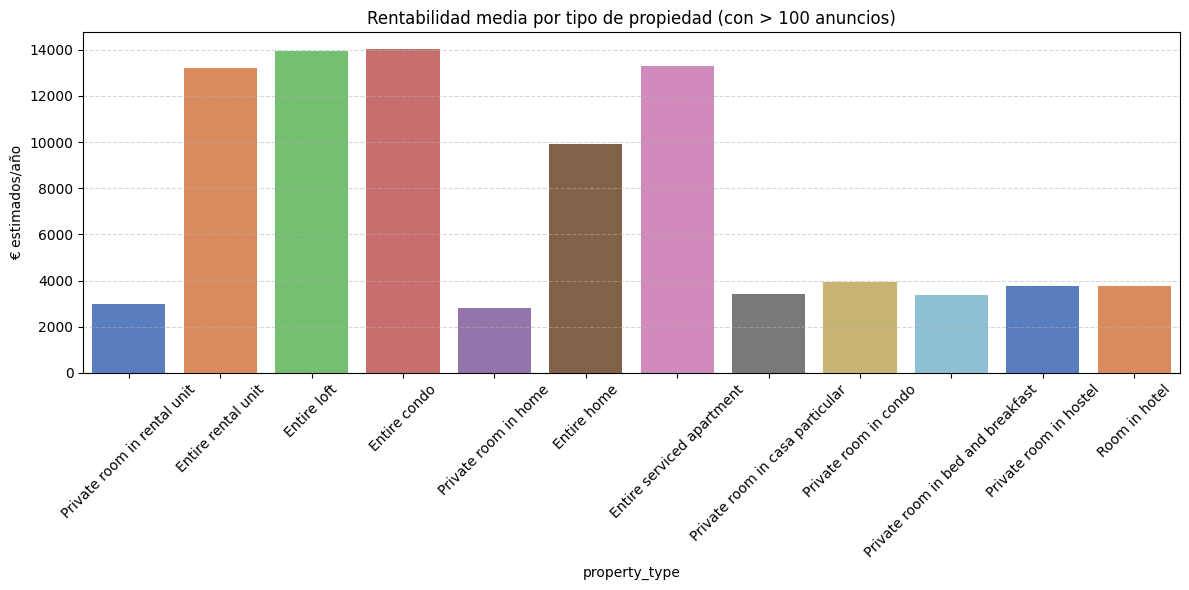

In [43]:
# RENTABILIDAD POR TIPO DE PROPIEADAD
# Agrupar por tipo de propiedad con más de 100 registros
prop_counts = df['property_type'].value_counts()
tipos_validos = prop_counts[prop_counts > 100].index

df_prop = df[df['property_type'].isin(tipos_validos)]

# Rentabilidad media
plt.figure(figsize=(12, 6))
sns.barplot(data=df_prop, x="property_type", y="estimated_revenue_l365d", estimator='mean', ci=None, palette="muted")
plt.xticks(rotation=45)
plt.ylabel("€ estimados/año")
plt.title("Rentabilidad media por tipo de propiedad (con > 100 anuncios)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


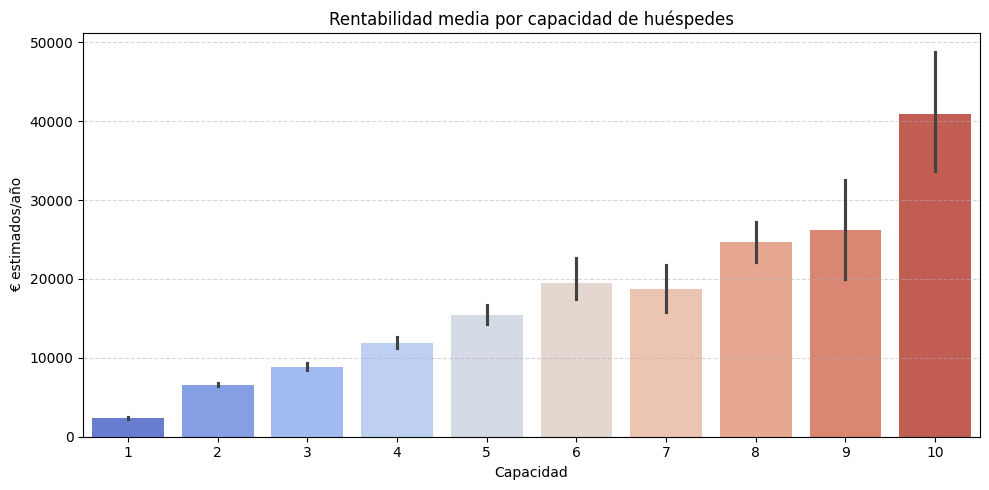

In [44]:
#rENTABILIDAD POR CAPACIDAD DE HUÉSPEDES
# Filtrar alojamientos con capacidad realista (hasta 10)
df_cap = df[df["accommodates"] <= 10]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_cap, x="accommodates", y="estimated_revenue_l365d", estimator='mean', palette="coolwarm")
plt.title("Rentabilidad media por capacidad de huéspedes")
plt.xlabel("Capacidad")
plt.ylabel("€ estimados/año")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


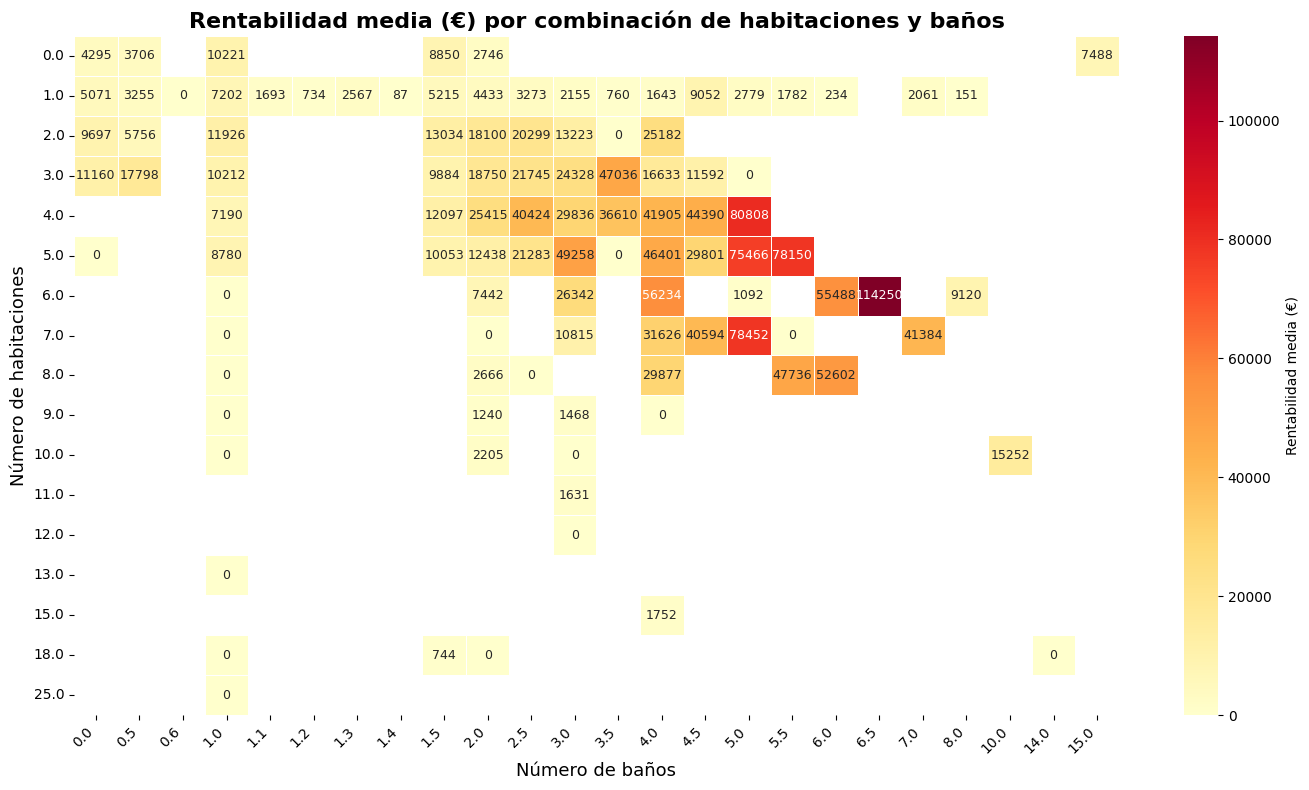

In [45]:
# Crear tabla dinámica para rentabilidad media por combinación de habitaciones y baños
pivot1 = df.pivot_table(
    index="bedrooms",
    columns="baños_redondeados",
    values="estimated_revenue_l365d",
    aggfunc="mean"
)

# Mejorar visualización de la matriz de calor
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot1,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'Rentabilidad media (€)'},
    mask=pivot1.isnull(),
    square=False,
    annot_kws={"size": 9}
)
plt.title("Rentabilidad media (€) por combinación de habitaciones y baños", fontsize=16, fontweight='bold')
plt.xlabel("Número de baños", fontsize=13)
plt.ylabel("Número de habitaciones", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretación de la matriz de rentabilidad media por combinación de habitaciones y baños

La matriz muestra la rentabilidad media anual estimada (€) según el número de habitaciones (`bedrooms`, filas) y el número de baños redondeados (`baños_redondeados`, columnas) para los alojamientos turísticos en Madrid.

**Principales conclusiones:**

- **Tendencia general:** A mayor número de habitaciones y baños, la rentabilidad media tiende a aumentar. Las combinaciones con más habitaciones y más baños suelen mostrar valores más altos de rentabilidad anual.
- **Rentabilidad máxima:** Las celdas con valores más elevados se encuentran en alojamientos con 3 o más habitaciones y 2 o más baños, lo que indica que las viviendas grandes y bien equipadas son las más rentables.
- **Variabilidad:** Existen celdas con valores atípicos o muy altos, probablemente debidos a pocos registros en esas combinaciones (por ejemplo, 4 habitaciones y 5 baños).
- **Segmentos menos rentables:** Los alojamientos con 1 habitación y 1 baño presentan rentabilidades medias significativamente menores, lo que sugiere que los estudios y apartamentos pequeños generan menos ingresos anuales.
- **Datos faltantes:** Muchas combinaciones no tienen datos (celdas vacías), lo que indica que son poco frecuentes en la oferta de Airbnb en Madrid.

**Recomendación:** Para maximizar la rentabilidad, conviene invertir en propiedades con varias habitaciones y baños, aunque siempre considerando la demanda real y la inversión inicial necesaria.

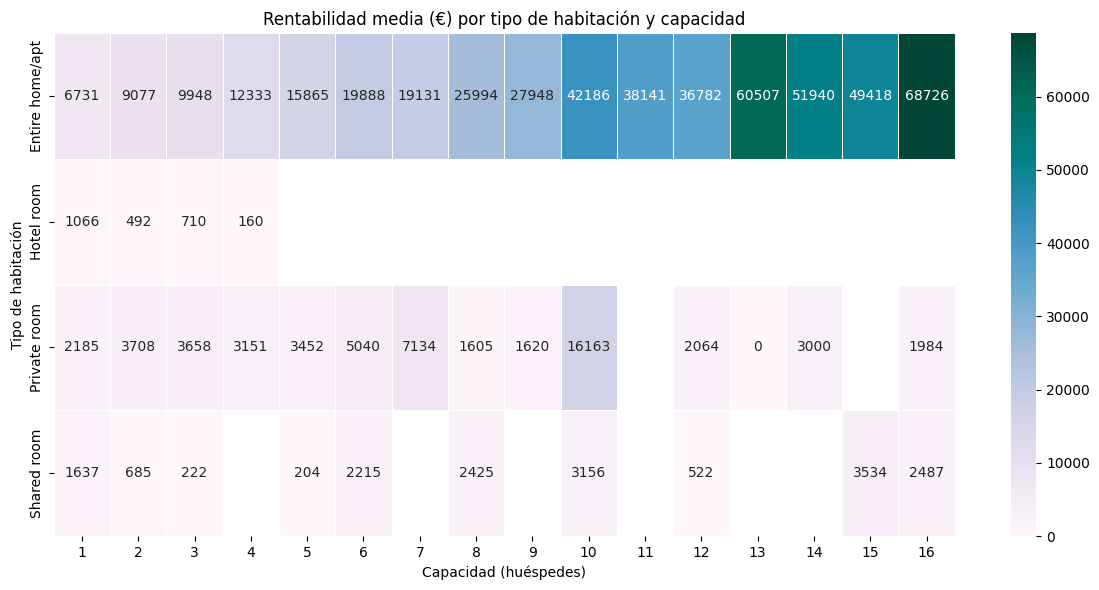

In [46]:
# Crear tabla dinámica para rentabilidad media por tipo de habitación y capacidad
pivot2 = df.pivot_table(
	index="room_type",
	columns="accommodates",
	values="estimated_revenue_l365d",
	aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap="PuBuGn", linewidths=0.5, linecolor="white")
plt.title("Rentabilidad media (€) por tipo de habitación y capacidad")
plt.xlabel("Capacidad (huéspedes)")
plt.ylabel("Tipo de habitación")
plt.tight_layout()
plt.show()


### Interpretación de la matriz de rentabilidad media por tipo de habitación y capacidad

La matriz muestra la rentabilidad media anual estimada (€) según el tipo de habitación (`room_type`, filas) y la capacidad de huéspedes (`accommodates`, columnas) para los alojamientos turísticos en Madrid.

**Principales conclusiones:**

- **Viviendas completas, mayor rentabilidad:** Los alojamientos de tipo "Entire home/apt" presentan la rentabilidad media más alta en todos los rangos de capacidad, especialmente a partir de 4 huéspedes, donde el crecimiento es muy notable.
- **Habitaciones privadas y compartidas:** Las "Private room" y "Shared room" muestran rentabilidades medias significativamente menores, con valores que apenas superan los 2.000–3.000 € anuales para la mayoría de capacidades.
- **Efecto de la capacidad:** En viviendas completas, la rentabilidad crece de forma casi lineal con la capacidad, alcanzando valores superiores a 40.000 € anuales para alojamientos de gran tamaño (10 o más huéspedes). En habitaciones privadas y compartidas, el incremento es mucho más moderado.
- **Hotel room:** Los alojamientos clasificados como "Hotel room" presentan rentabilidades bajas y poco representativas, probablemente por el bajo número de registros en algunas capacidades.
- **Segmentos más rentables:** El segmento más rentable es el de viviendas completas con capacidad para grupos grandes (8 o más huéspedes), aunque son menos frecuentes en la oferta.

**Recomendación:** Para maximizar la rentabilidad, resulta más interesante invertir en viviendas completas con capacidad para grupos, ya que combinan alta demanda y precios medios elevados. Las habitaciones privadas y compartidas pueden ser una opción para ingresos adicionales, pero su potencial de rentabilidad es mucho menor.

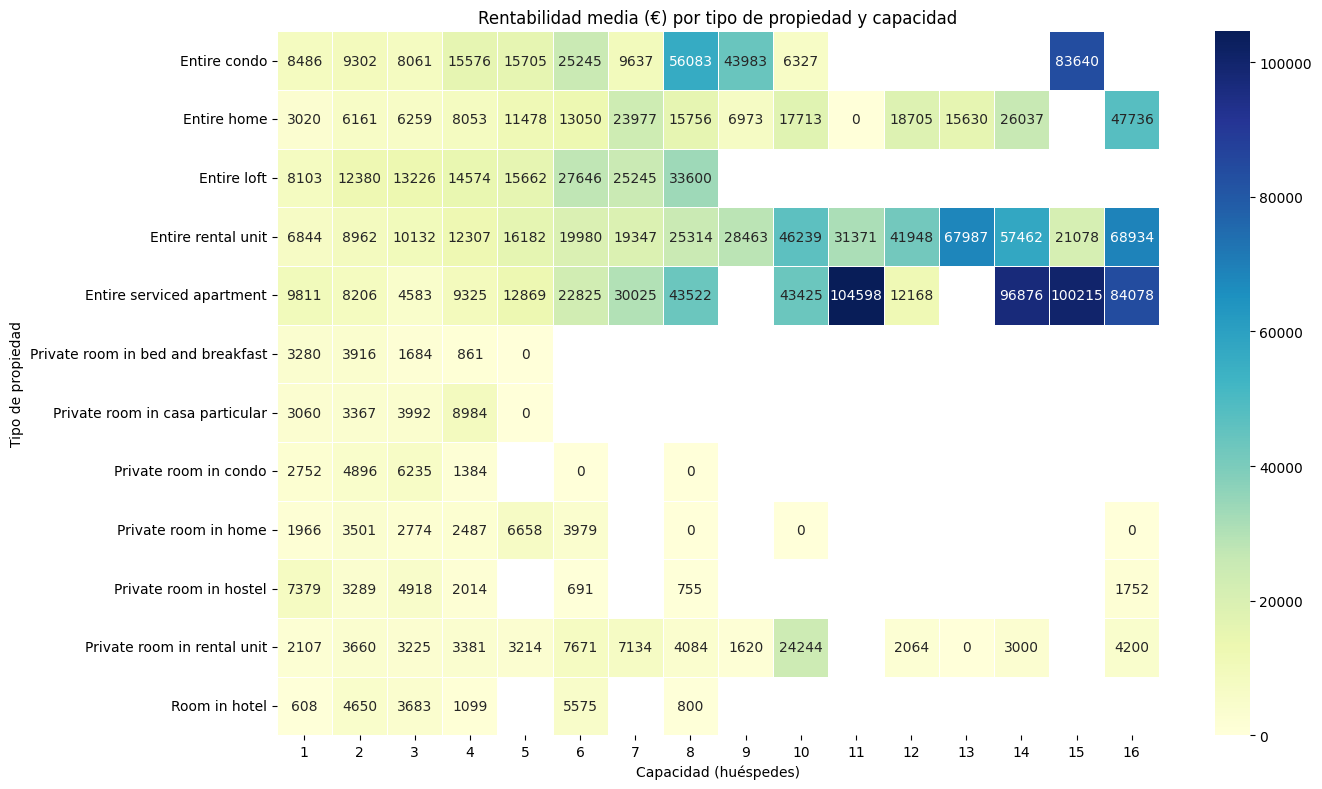

In [47]:
# Crear tabla dinámica para rentabilidad media por tipo de propiedad y capacidad
pivot3 = df_prop.pivot_table(
	index="property_type",
	columns="accommodates",
	values="estimated_revenue_l365d",
	aggfunc="mean"
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot3, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor="white")
plt.title("Rentabilidad media (€) por tipo de propiedad y capacidad")
plt.xlabel("Capacidad (huéspedes)")
plt.ylabel("Tipo de propiedad")
plt.tight_layout()
plt.show()


### Interpretación de la matriz de rentabilidad media por tipo de propiedad y capacidad

La matriz muestra la rentabilidad media anual estimada (€) según el tipo de propiedad (`property_type`, filas) y la capacidad de huéspedes (`accommodates`, columnas) para los alojamientos turísticos en Madrid.

**Principales conclusiones:**

- **Viviendas completas, mayor rentabilidad:** Las propiedades tipo "Entire rental unit", "Entire condo", "Entire loft" y "Entire home" presentan las rentabilidades medias más altas, especialmente a partir de 4 huéspedes, donde el crecimiento es muy notable. Esto indica que las viviendas completas y de mayor tamaño son las más rentables.
- **Apartamentos de servicio y lofts:** Los "Entire serviced apartment" y "Entire loft" también muestran rentabilidades elevadas, sobre todo en capacidades medias y altas, lo que sugiere que son opciones atractivas para grupos y estancias largas.
- **Habitaciones privadas, menor rentabilidad:** Las "Private room in rental unit", "Private room in home", "Private room in condo" y similares tienen rentabilidades medias significativamente menores, reflejando su menor precio por noche y capacidad limitada.
- **Hoteles y hostales:** Las categorías "Room in hotel" y "Private room in hostel" muestran rentabilidades variables, generalmente inferiores a las viviendas completas, y pueden estar influenciadas por el bajo número de registros en algunas capacidades.
- **Efecto de la capacidad:** En la mayoría de tipos de propiedad, la rentabilidad aumenta con la capacidad de huéspedes, aunque en algunos casos se observan valores atípicos o decrecimientos, probablemente por baja frecuencia de ciertas combinaciones.

**Recomendación:** Para maximizar la rentabilidad, resulta más interesante invertir en viviendas completas (apartamentos, lofts, condos) con capacidad para grupos, ya que combinan alta demanda y precios medios elevados. Las habitaciones privadas pueden ser una opción para ingresos adicionales, pero su potencial de rentabilidad es mucho menor.

In [48]:
# Top 5 combinaciones más rentables de habitaciones y baños
max_bed_bath = pivot1.stack().sort_values(ascending=False).head(5).reset_index()
max_bed_bath.columns = ["bedrooms", "bathrooms", "rentabilidad"]
print("🔝 Top combinaciones rentables (habitaciones - baños):")
print(max_bed_bath)


🔝 Top combinaciones rentables (habitaciones - baños):
   bedrooms  bathrooms   rentabilidad
0       6.0        6.5  114250.500000
1       4.0        5.0   80808.000000
2       7.0        5.0   78452.000000
3       5.0        5.5   78150.000000
4       5.0        5.0   75465.692908


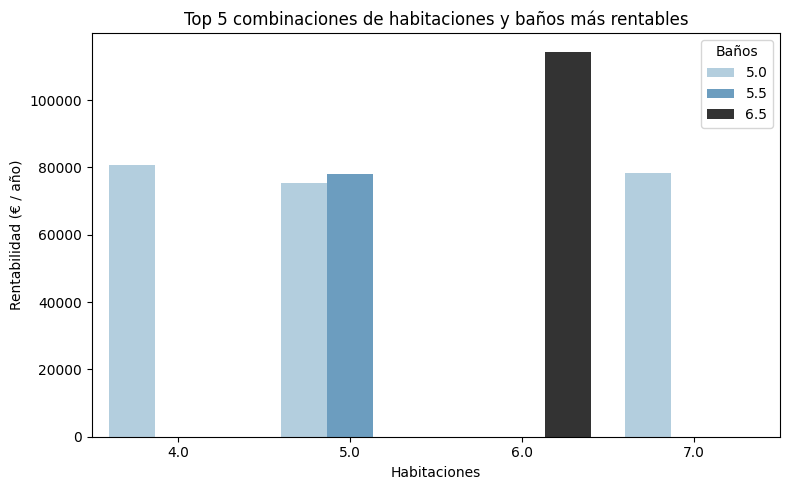

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=max_bed_bath, x="bedrooms", y="rentabilidad", hue="bathrooms", palette="Blues_d")
plt.title("Top 5 combinaciones de habitaciones y baños más rentables")
plt.xlabel("Habitaciones")
plt.ylabel("Rentabilidad (€ / año)")
plt.legend(title="Baños")
plt.tight_layout()
plt.show()


### Conclusiones del gráfico de las combinaciones más rentables de habitaciones y baños

- **Mayor rentabilidad en viviendas grandes:** Las combinaciones con mayor número de habitaciones y baños (por ejemplo, 6 habitaciones y 6,5 baños) presentan la rentabilidad anual más alta, superando los 100.000 €.
- **Incremento progresivo:** A medida que aumenta el número de habitaciones y baños, la rentabilidad media anual también crece de forma significativa.
- **Segmentos exclusivos:** Las combinaciones más rentables corresponden a propiedades de gran tamaño, probablemente orientadas a grupos grandes o alquileres premium, que son menos frecuentes pero muy lucrativas.
- **Importancia de los baños:** No solo el número de habitaciones, sino también el de baños, influye de manera relevante en la rentabilidad, ya que aporta comodidad y valor añadido al alojamiento.
- **Oportunidad de inversión:** Invertir en propiedades con varias habitaciones y baños puede maximizar los ingresos, aunque requiere una inversión inicial más elevada y puede estar sujeto a una demanda más específica.

In [50]:
# Top 5 combinaciones más rentables de tipo de habitación y capacidad
max_room_accom = pivot2.stack().sort_values(ascending=False).head(5).reset_index()
max_room_accom.columns = ["room_type", "accommodates", "rentabilidad"]
print("🔝 Top combinaciones rentables (tipo de habitación - capacidad):")
print(max_room_accom)


🔝 Top combinaciones rentables (tipo de habitación - capacidad):
         room_type  accommodates  rentabilidad
0  Entire home/apt            16  68725.551724
1  Entire home/apt            13  60507.428571
2  Entire home/apt            14  51940.384615
3  Entire home/apt            15  49417.800000
4  Entire home/apt            10  42186.313544


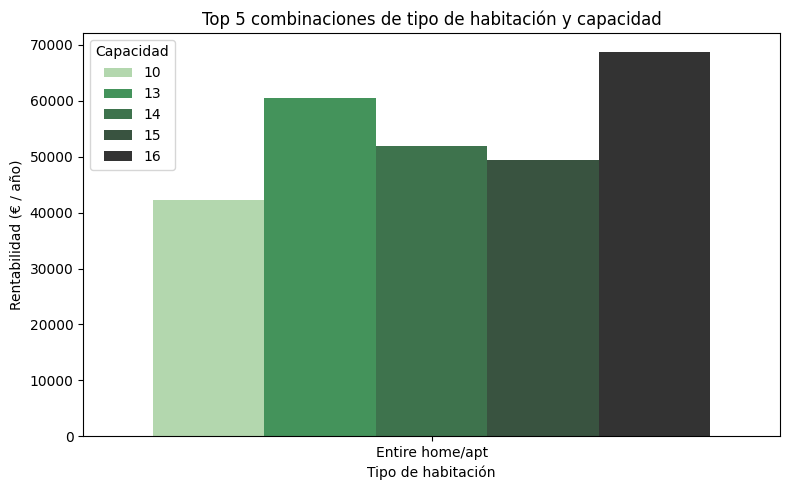

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(data=max_room_accom, x="room_type", y="rentabilidad", hue="accommodates", palette="Greens_d")
plt.title("Top 5 combinaciones de tipo de habitación y capacidad")
plt.xlabel("Tipo de habitación")
plt.ylabel("Rentabilidad (€ / año)")
plt.legend(title="Capacidad")
plt.tight_layout()
plt.show()


### Conclusiones del gráfico de las combinaciones más rentables de tipo de habitación y capacidad

- **Viviendas completas, máxima rentabilidad:** Las combinaciones más rentables corresponden a la categoría "Entire home/apt" (vivienda completa) con capacidades altas (de 10 a 16 huéspedes), superando los 40.000 € anuales y alcanzando valores cercanos a 70.000 €.
- **Capacidad, factor clave:** A mayor capacidad de alojamiento, mayor es la rentabilidad media anual, lo que indica que los alojamientos preparados para grupos grandes generan los mayores ingresos.
- **Escasa rentabilidad en otras categorías:** No aparecen en el top habitaciones privadas o compartidas, lo que confirma que su potencial de rentabilidad es mucho menor frente a las viviendas completas.
- **Segmento premium:** Estas combinaciones suelen corresponder a propiedades exclusivas, orientadas a grupos numerosos o alquileres premium, que aunque son menos frecuentes, resultan muy lucrativas.
- **Estrategia de inversión:** Para maximizar ingresos, resulta más rentable invertir en viviendas completas de gran capacidad, aunque requieren mayor inversión inicial y gestión.

In [52]:
# Top 5 combinaciones más rentables de tipo de propiedad y capacidad
max_prop_accom = pivot3.stack().sort_values(ascending=False).head(5).reset_index()
max_prop_accom.columns = ["property_type", "accommodates", "rentabilidad"]
print("🔝 Top combinaciones rentables (tipo de propiedad - capacidad):")
print(max_prop_accom)


🔝 Top combinaciones rentables (tipo de propiedad - capacidad):
               property_type  accommodates  rentabilidad
0  Entire serviced apartment            11      104598.0
1  Entire serviced apartment            15      100215.0
2  Entire serviced apartment            14       96876.0
3  Entire serviced apartment            16       84078.0
4               Entire condo            15       83640.0


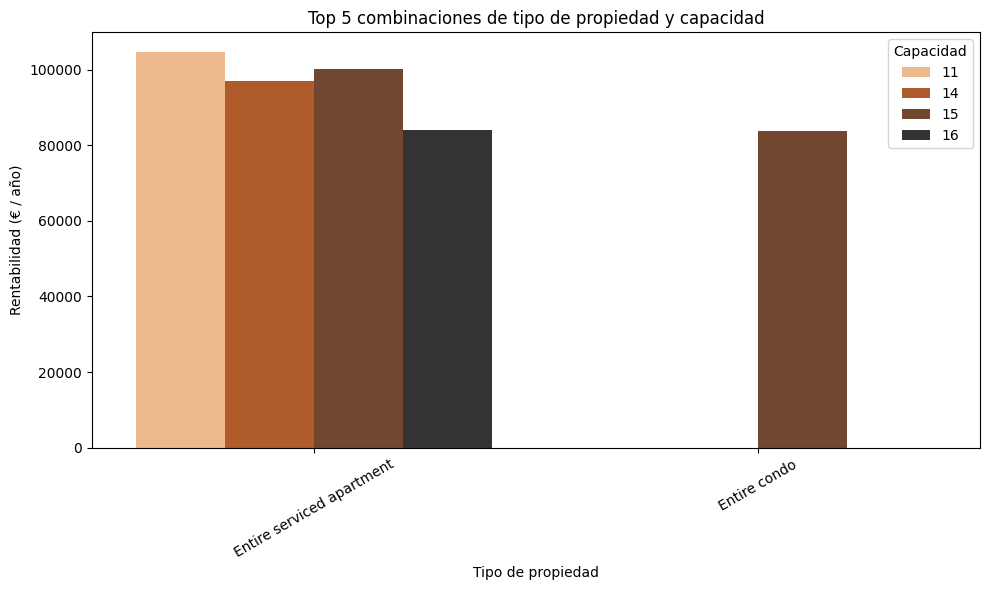

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=max_prop_accom, x="property_type", y="rentabilidad", hue="accommodates", palette="Oranges_d")
plt.title("Top 5 combinaciones de tipo de propiedad y capacidad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Rentabilidad (€ / año)")
plt.xticks(rotation=30)
plt.legend(title="Capacidad")
plt.tight_layout()
plt.show()


### Conclusiones del gráfico de las combinaciones más rentables de tipo de propiedad y capacidad

- **Apartamentos de servicio, máxima rentabilidad:** Las combinaciones más rentables corresponden a "Entire serviced apartment" con capacidades altas (11 a 16 huéspedes), superando los 80.000 € anuales y alcanzando valores por encima de 100.000 €.
- **Propiedades completas y grandes:** Los "Entire condo" también aparecen entre las opciones más rentables, especialmente para grupos grandes (15 huéspedes).
- **Capacidad, factor clave:** Todas las combinaciones top corresponden a propiedades completas con alta capacidad, lo que confirma que alojar a grupos numerosos maximiza los ingresos.
- **Segmento premium:** Estas propiedades suelen ser exclusivas y menos frecuentes, orientadas a alquileres premium o grupos grandes.
- **Estrategia de inversión:** Para obtener la mayor rentabilidad, resulta más interesante invertir en apartamentos de servicio o condominios completos de gran capacidad, aunque requieren mayor inversión y gestión.

In [68]:
import pandas as pd

# Cargar los archivos CSV
df_precio = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_corregido.csv')
df_neighbourhoods = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.csv')

# Normalizar los nombres de los barrios en ambos DataFrames
df_precio['neighbourhood'] = df_precio['neighbourhood'].str.lower().str.strip()
df_neighbourhoods['neighbourhood_group'] = df_neighbourhoods['neighbourhood_group'].str.lower().str.strip()

# Diccionario de mapeo para ajustar los nombres
mapeo_nombres = {
    'fuencarral-el pardo': 'fuencarral - el pardo',
    'moncloa-aravaca': 'moncloa - aravaca',
    'san blas-canillejas': 'san blas - canillejas',
    'villa de vallecas': 'villa de vallecas',
    'vicálvaro': 'vicálvaro',
    'puente de vallecas': 'puente de vallecas',
    'chamartín': 'chamartín',
    'chamberí': 'chamberí',
    'ciudad lineal': 'ciudad lineal',
    'tetuán': 'tetuán',
    'retiro': 'retiro',
    'salamanca': 'salamanca',
    'latina': 'latina',
    'usera': 'usera',
    'carabanchel': 'carabanchel',
    'arganzuela': 'arganzuela',
    'barajas': 'barajas',
    'centro': 'centro',
    'hortaleza': 'hortaleza',
}

# Aplicar el mapeo para corregir los nombres en el DataFrame de precios
df_precio['neighbourhood'] = df_precio['neighbourhood'].replace(mapeo_nombres)

# Guardar el archivo corregido
df_precio.to_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv', index=False)

print("✅ Nombres de barrios ajustados y archivo guardado.")

✅ Nombres de barrios ajustados y archivo guardado.


In [86]:
# Añadir columna 'neighbourhood_group' a df_precio mediante merge
df_precio = df_precio.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

media_precio_distrito = df_precio.groupby('neighbourhood_group')['price_per_m2_jun2025'].mean()
print(media_precio_distrito)


Series([], Name: price_per_m2_jun2025, dtype: float64)


In [89]:
pd.set_option('display.max_rows', None)
print(df_precio)


            neighbourhood  price_per_m2_jun2025 monthly_change  \
0              arganzuela                  5729          +1.0%   
1                 barajas                  4415          +1.0%   
2             carabanchel                  3308          +2.4%   
3                  centro                  7253          +0.8%   
4               chamartín                  7369          +2.7%   
5                chamberí                  8333          +2.9%   
6           ciudad lineal                  4606          +2.8%   
7   fuencarral - el pardo                  4888          +1.2%   
8               hortaleza                  5031          +1.6%   
9                  latina                  3638           n.d.   
10      moncloa - aravaca                  5811          +2.1%   
11              moratalaz                  3902           n.d.   
12     puente de vallecas                  2851          +1.3%   
13                 retiro                  7295          +0.1%   
14        

In [91]:
# Rellenar los barrios sin valor con la media de su distrito
# Calcular la media del precio por distrito (neighbourhood_group)
media_distritos = df_precio.groupby('neighbourhood_group')['price_per_m2_jun2025'].mean().to_dict()

# Crear columna de precio para cada barrio, usando la media del distrito
df_precio['precio_neighbourhood'] = df_precio.apply(
    lambda row: media_distritos[row['neighbourhood_group']] if pd.notna(row['neighbourhood_group']) else np.nan,
    axis=1
)


In [ ]:
df_precio = df_precio.drop(columns=['neighbourhood_group', 'precio_neighbourhood'])


In [103]:
pd.set_option('display.max_rows', None)
print(df_precio)


            neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max              name_norm
0              arganzuela                  5729          +1.0%            +7.3%        +18.1%                  5729               0.0%             arganzuela
1                 barajas                  4415          +1.0%            +8.5%        +19.8%                  4415               0.0%                barajas
2             carabanchel                  3308          +2.4%            +8.9%        +22.9%                  3308               0.0%            carabanchel
3                  centro                  7253          +0.8%            +6.4%        +11.5%                  7253               0.0%                 centro
4               chamartín                  7369          +2.7%            +5.4%         +7.2%                  7369               0.0%              chamartín
5                chamberí                  8333     

In [107]:
# Limpiar la columna monthly_change: sustituir 'n.d.' por '0.0%'
if 'monthly_change' in df_precio.columns:
    df_precio['monthly_change'] = df_precio['monthly_change'].replace('n.d.', '0.0%')

# Mostrar el DataFrame limpio
pd.set_option('display.max_rows', None)
print(df_precio)

            neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max              name_norm
0              arganzuela                  5729          +1.0%            +7.3%        +18.1%                  5729               0.0%             arganzuela
1                 barajas                  4415          +1.0%            +8.5%        +19.8%                  4415               0.0%                barajas
2             carabanchel                  3308          +2.4%            +8.9%        +22.9%                  3308               0.0%            carabanchel
3                  centro                  7253          +0.8%            +6.4%        +11.5%                  7253               0.0%                 centro
4               chamartín                  7369          +2.7%            +5.4%         +7.2%                  7369               0.0%              chamartín
5                chamberí                  8333     

In [116]:
import json
from shapely.geometry import shape, MultiPolygon, Polygon
import geopandas as gpd

# Cargar archivo GeoJSON
with open(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.geojson", encoding='utf-8') as f:
    geojson_data = json.load(f)

# Procesar geometrías y crear name_norm
records = []
for feature in geojson_data['features']:
    props = feature['properties']
    geom = shape(feature['geometry'])
    
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    if isinstance(geom, Polygon):
        props['geometry'] = geom
        props['name_norm'] = props['neighbourhood'].lower().strip()  # CREACIÓN AQUÍ
        records.append(props)

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(records, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# Verificar los primeros valores
print("🔎 Primeros barrios en GeoJSON con name_norm:")
print(gdf[["neighbourhood", "name_norm"]].head())


🔎 Primeros barrios en GeoJSON con name_norm:
  neighbourhood    name_norm
0       Palacio      palacio
1   Embajadores  embajadores
2        Cortes       cortes
3      Justicia     justicia
4   Universidad  universidad


In [119]:
# Normalizar los nombres en ambas columnas
df_precio["neighbourhood"] = df_precio["neighbourhood"].str.lower().str.strip()
df_precio["name_norm"] = df_precio["neighbourhood"]

# Verificar que los valores sean iguales
print("📊 Verificación de valores unificados:")
print(df_precio[["neighbourhood", "name_norm"]].head())

📊 Verificación de valores unificados:
  neighbourhood    name_norm
0    arganzuela   arganzuela
1       barajas      barajas
2   carabanchel  carabanchel
3        centro       centro
4     chamartín    chamartín


In [120]:
import pandas as pd

# Cargar precios €/m²
df_precio = pd.read_csv(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv")

# Normalizar y crear name_norm
df_precio["neighbourhood"] = df_precio["neighbourhood"].str.lower().str.strip()
df_precio["name_norm"] = df_precio["neighbourhood"]  # CREACIÓN AQUÍ

# Verificar
print("📊 Primeros barrios en CSV con name_norm:")
print(df_precio[["neighbourhood", "name_norm", "price_per_m2_jun2025"]].head())


📊 Primeros barrios en CSV con name_norm:
  neighbourhood    name_norm  price_per_m2_jun2025
0    arganzuela   arganzuela                  5729
1       barajas      barajas                  4415
2   carabanchel  carabanchel                  3308
3        centro       centro                  7253
4     chamartín    chamartín                  7369


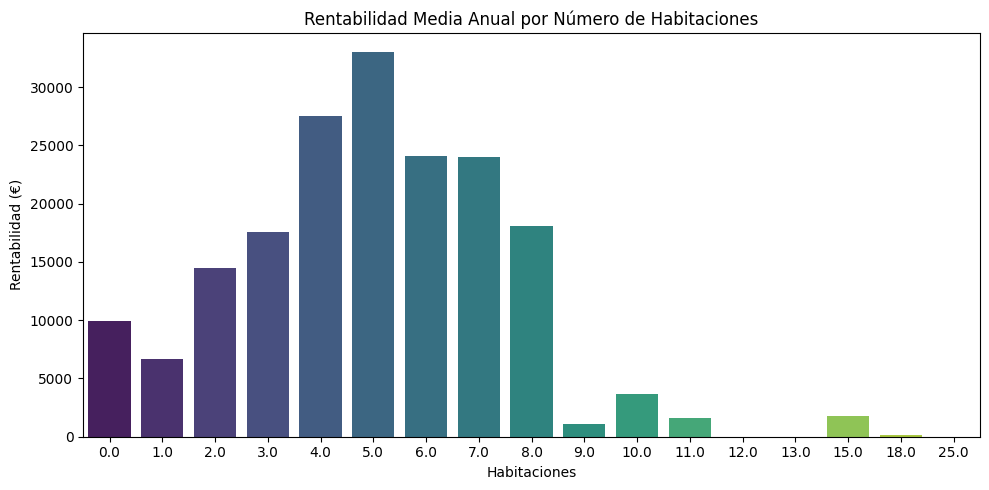

In [122]:
# rentabilidad por número de habitaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que bedrooms es numérico
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Agrupar y calcular media
bedroom_stats = df.groupby('bedrooms')['estimated_revenue_l365d'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=bedroom_stats, x='bedrooms', y='estimated_revenue_l365d', palette='viridis')
plt.title('Rentabilidad Media Anual por Número de Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Rentabilidad (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


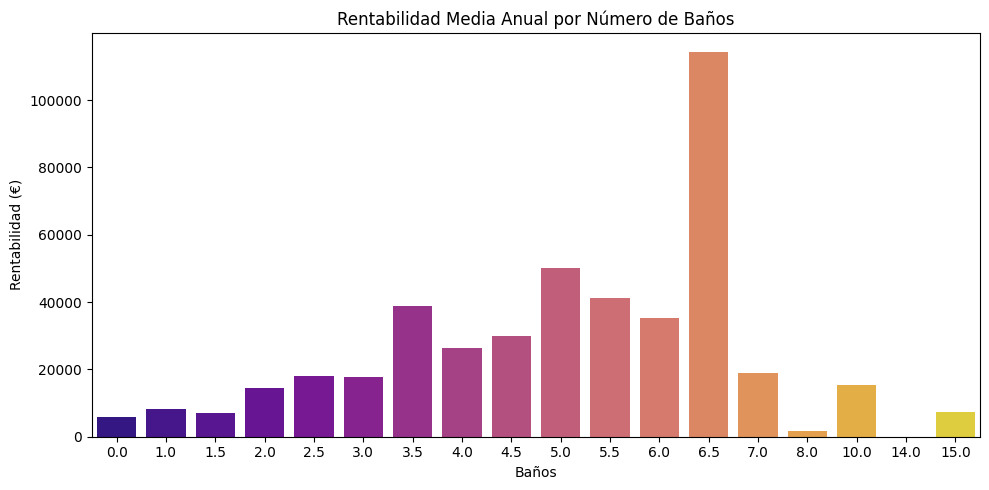

In [124]:
# Convertir 'bathrooms_text' a número de baños aproximado
df['bathrooms_text_clean'] = df['bathrooms_text'].astype(str).str.extract(r'(\d+(?:\.\d+)?)')
df['bathrooms'] = pd.to_numeric(df['bathrooms_text_clean'], errors='coerce')

# Agrupar y calcular media
bathroom_stats = df.groupby('bathrooms')['estimated_revenue_l365d'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=bathroom_stats, x='bathrooms', y='estimated_revenue_l365d', palette='plasma')
plt.title('Rentabilidad Media Anual por Número de Baños')
plt.xlabel('Baños')
plt.ylabel('Rentabilidad (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


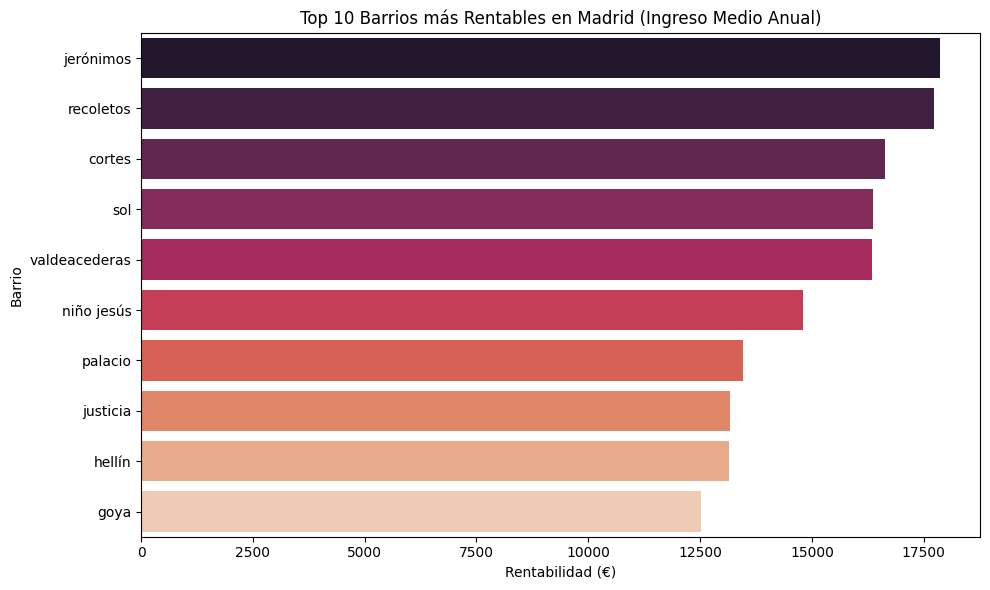

In [125]:
# Agrupar por barrio y calcular la media de ingresos estimados
top_barrios = (
    df.groupby("neighbourhood")["estimated_revenue_l365d"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_barrios, x="estimated_revenue_l365d", y="neighbourhood", palette="rocket")
plt.title("Top 10 Barrios más Rentables en Madrid (Ingreso Medio Anual)")
plt.xlabel("Rentabilidad (€)")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()


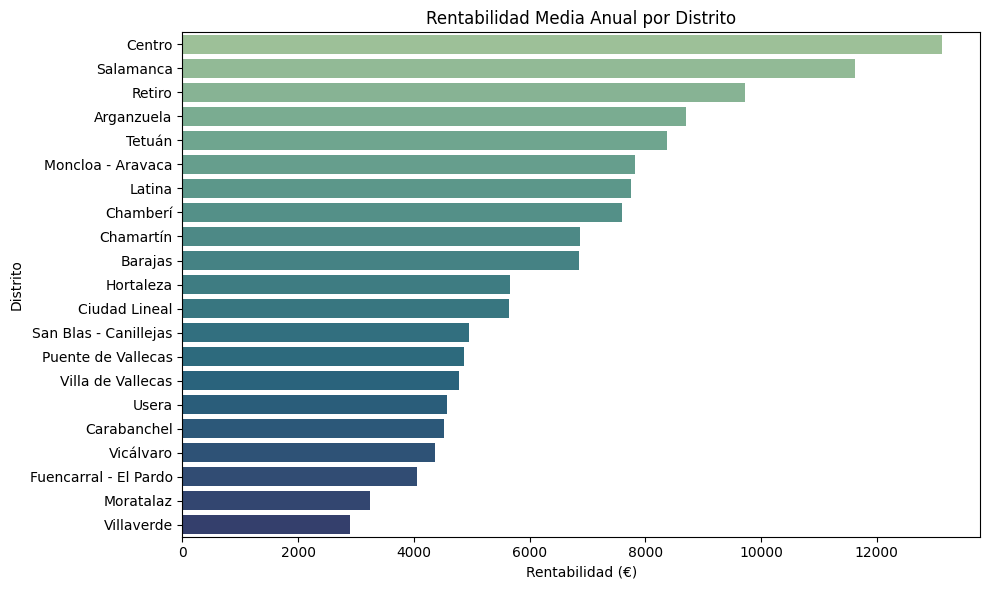

In [126]:
# Agrupar por distrito y calcular la rentabilidad media
grupo_rentabilidad = (
    df.groupby("neighbourhood_group")["estimated_revenue_l365d"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=grupo_rentabilidad, x="estimated_revenue_l365d", y="neighbourhood_group", palette="crest")
plt.title("Rentabilidad Media Anual por Distrito")
plt.xlabel("Rentabilidad (€)")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()


In [129]:
print("PRECIO:", df_precio.columns.tolist())
print("RENTABILIDAD:", df_rentabilidad.columns.tolist())
print("LISTINGS:", df_listings.columns.tolist())


PRECIO: ['neighbourhood', 'price_per_m2_jun2025', 'monthly_change', 'quarterly_change', 'annual_change', 'max_historical_price', 'variation_from_max']
RENTABILIDAD: ['neighbourhood', 'estimated_revenue_l365d']
LISTINGS: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 

In [130]:
print("CIUDAD:", df_ciudad.columns.tolist())


CIUDAD: ['neighbourhood', 'price_per_m2_jun2025', 'monthly_change', 'quarterly_change', 'annual_change', 'max_historical_price', 'variation_from_max', 'estimated_revenue_l365d_x', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maxim

In [132]:
print("PRECIO barrios:", set(df_precio['neighbourhood']))
print("RENTABILIDAD barrios:", set(df_rentabilidad['neighbourhood']))
print("LISTINGS barrios:", set(df_listings['neighbourhood']))


PRECIO barrios: {'puente de vallecas', 'latina', 'ciudad lineal', 'centro', 'hortaleza', 'vicálvaro', 'tetuán', 'retiro', 'barajas', 'moratalaz', 'chamberí', 'villa de vallecas', 'fuencarral - el pardo', 'carabanchel', 'usera', 'arganzuela', 'chamartín', 'salamanca', 'moncloa - aravaca', 'san blas - canillejas'}
RENTABILIDAD barrios: {'moscardó', 'piovera', 'concepción', 'valverde', 'pueblo nuevo', 'pacífico', 'cármenes', 'apostol santiago', 'rios rosas', 'marroquina', 'arapiles', 'palos de moguer', 'valdemarín', 'abrantes', 'almenara', 'castilla', 'rejas', 'palomas', 'berruguete', 'acacias', 'butarque', 'estrella', 'chopera', 'el plantío', 'puerta del angel', 'cortes', 'alameda de osuna', 'atalaya', 'san diego', 'bellas vistas', 'castellana', 'los rosales', 'lista', 'zofío', 'palomeras bajas', 'casa de campo', 'aguilas', 'vinateros', 'recoletos', 'amposta', 'pinar del rey', 'san andrés', 'corralejos', 'fuente del berro', 'universidad', 'san fermín', 'santa eugenia', 'colina', 'ciudad 

In [140]:
# Agrupar rentabilidad y características a nivel de distrito
df_rentab_distrito = df_rentabilidad.merge(df_listings[['neighbourhood', 'neighbourhood_group']], on='neighbourhood')
df_rentab_distrito = df_rentab_distrito.groupby('neighbourhood_group').mean(numeric_only=True).reset_index()

# Unir con df_precio por distrito
df_precio['neighbourhood_group'] = df_precio['neighbourhood']  # en ese df, neighbourhood es distrito
df_distrito = df_precio[['neighbourhood_group', 'price_per_m2_jun2025']].merge(
    df_rentab_distrito, on='neighbourhood_group', how='inner'
)

# Verificar
print(df_distrito.head())


Empty DataFrame
Columns: [neighbourhood_group, price_per_m2_jun2025, estimated_revenue_l365d]
Index: []


In [139]:
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))


Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaverde']


In [150]:
# Normalizar los nombres de los barrios en ambos DataFrames
df_precio['neighbourhood_group'] = df_precio['neighbourhood_group'].str.lower().str.strip()
df_rentab_distrito['neighbourhood_group'] = df_rentab_distrito['neighbourhood_group'].str.lower().str.strip()

# Verificar los nombres únicos en ambos DataFrames
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

# Unificar los nombres si hay diferencias específicas (opcional)
mapeo_nombres = {
    'fuencarral-el pardo': 'fuencarral - el pardo',
    'moncloa-aravaca': 'moncloa - aravaca',
    # Agregar más mapeos si es necesario
}

df_precio['neighbourhood_group'] = df_precio['neighbourhood_group'].replace(mapeo_nombres)
df_rentab_distrito['neighbourhood_group'] = df_rentab_distrito['neighbourhood_group'].replace(mapeo_nombres)

# Verificar nuevamente después de la unificación
print("Distritos unificados en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos unificados en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaverde']
Distritos unificados en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas']


In [154]:
# muestra los distritos en df_precio y df_rentab_distrito y df_listings
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))

Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaverde']
Distritos en df_listings: ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaver

In [155]:
# Modificar distritos de df_listings para que coincidan con los de df_precio y df_rentab_distrito
df_listings['neighbourhood_group'] = df_listings['neighbourhood_group'].str.lower().str.strip()

In [ ]:
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

Distritos en df_listings: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaverde']


In [158]:
# Verificar los nombres únicos de los distritos en cada DataFrame
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

# Identificar diferencias entre los DataFrames
print("\nDistritos en df_listings pero no en df_precio:")
print(sorted(set(df_listings['neighbourhood_group']) - set(df_precio['neighbourhood_group'])))

print("\nDistritos en df_precio pero no en df_listings:")
print(sorted(set(df_precio['neighbourhood_group']) - set(df_listings['neighbourhood_group'])))

print("\nDistritos en df_rentab_distrito pero no en df_precio:")
print(sorted(set(df_rentab_distrito['neighbourhood_group']) - set(df_precio['neighbourhood_group'])))

Distritos en df_listings: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaverde']
Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamartín', 'chamberí', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetuán', 'usera', 'vicálvaro', 'villa de vallecas', 'villaver

In [163]:
# Agregar Villaverde al DataFrame df_precio
nuevo_distrito = {
    'neighbourhood': 'villaverde',
    'price_per_m2_jun2025': 2500,  # Valor estimado o predeterminado
    # Agrega otras columnas necesarias con valores predeterminados
}

# Convertir a DataFrame y concatenar
df_precio = pd.concat([df_precio, pd.DataFrame([nuevo_distrito])], ignore_index=True)

# Verificar que Villaverde se haya agregado
print(df_precio[df_precio['neighbourhood'] == 'villaverde'])

   neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max
20    villaverde                  2500            NaN              NaN           NaN                   NaN                NaN


In [153]:
import pandas as pd

# Cargar el archivo neighbourhoods_madrid.csv
df_neighbourhoods = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.csv')

# Normalizar los nombres de los barrios en el archivo
df_neighbourhoods['neighbourhood'] = df_neighbourhoods['neighbourhood'].str.lower().str.strip()

# Normalizar los nombres de los barrios en los DataFrames barrios_rentabilidad y barrios_listings
df_rentabilidad['neighbourhood'] = df_rentabilidad['neighbourhood'].str.lower().str.strip()
df_listings['neighbourhood'] = df_listings['neighbourhood'].str.lower().str.strip()

# Imputar solo la columna neighbourhood_group desde df_neighbourhoods para evitar duplicados
if 'neighbourhood_group' in df_rentabilidad.columns:
	df_rentabilidad = df_rentabilidad.drop(columns=['neighbourhood_group'])
df_rentabilidad = df_rentabilidad.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

if 'neighbourhood_group' in df_listings.columns:
	df_listings = df_listings.drop(columns=['neighbourhood_group'])
df_listings = df_listings.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

# Verificar los resultados
print(df_rentabilidad.head())
print(df_listings.head())

  neighbourhood  estimated_revenue_l365d neighbourhood_group_x neighbourhood_group_y neighbourhood_group
0      abrantes              1963.366359           carabanchel           Carabanchel         Carabanchel
1       acacias              8355.398900            arganzuela            Arganzuela          Arganzuela
2       adelfas              4220.961031                retiro                Retiro              Retiro
3    aeropuerto              5282.500000               barajas               Barajas             Barajas
4       aguilas              1692.520604                latina                Latina              Latina
      id                         listing_url       scrape_id last_scraped           source                                          name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url host_name  host_since  host_l

In [164]:
import pandas as pd

# Cargar los datasets necesarios
df_precio = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv')
df_rentabilidad = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\rentabilidad_barrio.csv')
df_listings = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\listings_cleaned_madrid.csv')

# Normalizar nombres de barrios para asegurar consistencia
df_precio['neighbourhood'] = df_precio['neighbourhood'].str.lower().str.strip()
df_rentabilidad['neighbourhood'] = df_rentabilidad['neighbourhood'].str.lower().str.strip()
df_listings['neighbourhood'] = df_listings['neighbourhood'].str.lower().str.strip()

# Combinar los DataFrames en base a la columna 'neighbourhood'
df_ciudad = pd.merge(df_precio, df_rentabilidad, on='neighbourhood', how='inner')
df_ciudad = pd.merge(df_ciudad, df_listings, on='neighbourhood', how='inner')

# Seleccionar columnas relevantes y renombrar columna de rentabilidad
df_ciudad = df_ciudad[['neighbourhood', 'price_per_m2_jun2025', 'estimated_revenue_l365d_x', 
                       'bedrooms', 'accommodates', 'room_type', 'bathrooms', 'neighbourhood_group']]
df_ciudad = df_ciudad.rename(columns={'estimated_revenue_l365d_x': 'estimated_revenue_l365d'})

# Verificar el resultado
print(df_ciudad.head())

Empty DataFrame
Columns: [neighbourhood, price_per_m2_jun2025, estimated_revenue_l365d, bedrooms, accommodates, room_type, bathrooms, neighbourhood_group]
Index: []
